# Exercise: Categorical and Date Variables

Transforming data include not only manipulating numerical and character vectors, but also changing data into categorical variables that are handy when doing statistical analyis or plotting with groupings in the variable of interest, e.g. virus positive vs. negative group, vaccinated vs. placebo group, etc. In addition, if you are handling time-series data such as the COVID-19 dataset, then it is easier to work with this data if R is aware that the variable has a time element.  

When you finish this exercise, you will learn how to:
1. Handle categorical variables using the **forcats** package
2. Handle date variables using the **lubridate** package

Load packages in tidyverse.

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **forcats** package

In this notebook, you will be using the functions in the **forcats** package to manipulate categorical variables. Check out the [cheatsheet for **forcats**](https://raw.githubusercontent.com/rstudio/cheatsheets/master/factors.pdf) to familiarize yourself with its functions. **Forcats** are useful when you are handling factors or categorical variables, which a have a fixed and known set of values.

In [2]:
# Read the forcats documentation
help(package="forcats")

Documentation for package ‘forcats’


		Information on package ‘forcats’

Description:

Package:            forcats
Title:              Tools for Working with Categorical Variables
                    (Factors)
Version:            0.5.0
Authors@R:          c(person(given = "Hadley", family = "Wickham", role
                    = c("aut", "cre"), email = "hadley@rstudio.com"),
                    person(given = "RStudio", role = c("cph", "fnd")))
Description:        Helpers for reordering factor levels (including
                    moving specified levels to front, ordering by first
                    appearance, reversing, and randomly shuffling), and
                    tools for modifying factor levels (including
                    collapsing rare levels into other, 'anonymising',
                    and manually 'recoding').
License:            GPL-3
URL:                http://forcats.tidyverse.org,
                    https://github.com/tidyverse/forcats
BugReports:         http

## World Bank population data

In this notebook, you will continue playing around with the [World Bank population dataset](https://datacatalog.worldbank.org/dataset/population-estimates-and-projections). This time, instead of downloading the data from the website, an alternative way of accessing this dataset is to install the R package **`wbstats`**.

In [3]:
# Install the 'wbstats' package
install.packages("wbstats")

Installing package into ‘/Users/claudius/Rlibs’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0v/_2vsqk3j1nxcfb13d3g7g5nc0000gn/T//RtmpE0NPC7/downloaded_packages


In [4]:
# Load the 'wbstats' package
library(wbstats)

In [5]:
# Read the 'wbstats' documentation
help(package="wbstats")

Documentation for package ‘wbstats’


		Information on package ‘wbstats’

Description:

Type:               Package
Package:            wbstats
Title:              Programmatic Access to Data and Statistics from the
                    World Bank API
Version:            1.0.4
Authors@R:          c(person(given = "Jesse", family = "Piburn", role =
                    c("aut", "cre"), email = "piburnjo@ornl.gov",
                    comment = c(ORCID = "0000-0003-4967-7912")),
                    person(given = "UT-Battelle, LLC", role = "cph"))
Maintainer:         Jesse Piburn <piburnjo@ornl.gov>
Description:        Search and download data from the World Bank Data
                    API.
License:            MIT + file LICENSE
URL:                https://github.com/nset-ornl/wbstats
BugReports:         https://github.com/nset-ornl/wbstats/issues
Depends:            R (>= 3.2)
Imports:            dplyr, httr, jsonlite, lifecycle, lubridate, readr,
                    rlang, stringr, tib

Use the cached version of the data to start accessing the datasets. However, the cached data is not updated. To update the datasets, use the **`wb_cache( )`** function.

In [6]:
# Update the cached datasets
new_cache <- wb_cache()

In [7]:
# Check the data structure
str(new_cache, max.level = 1)

List of 8
 $ countries    : tibble [297 × 18] (S3: tbl_df/tbl/data.frame)
 $ indicators   : tibble [16,643 × 8] (S3: tbl_df/tbl/data.frame)
 $ sources      : tibble [62 × 9] (S3: tbl_df/tbl/data.frame)
 $ topics       : tibble [21 × 3] (S3: tbl_df/tbl/data.frame)
 $ regions      : tibble [42 × 4] (S3: tbl_df/tbl/data.frame)
 $ income_levels: tibble [7 × 3] (S3: tbl_df/tbl/data.frame)
 $ lending_types: tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ languages    : tibble [23 × 3] (S3: tbl_df/tbl/data.frame)


For this exercise, you will need the dataset for population ("SP.POP.TOTL") and gross domestic product, GDP ("NY.GDP.MKTP.CD") for each country.

In [8]:
# Specify the indicators of interest
my_indicators = c("population" = "SP.POP.TOTL",
                  "gdp" = "NY.GDP.MKTP.CD")

Use the **`wb_data( )`** function to download the data. You can use the **`start_date`** and **`end_date`** arguments to specifiy the start and end years, respectively. Alternatively, you can use the **`mrnev`** argument, which stands for most recent non empty value to return the latest available data for each country.

In [22]:
population <- wb_data(my_indicators, mrnev = 1, cache = new_cache)
head(population)

iso2c,iso3c,country,date,gdp,population
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
AW,ABW,Aruba,2017,3056424581,NA
AW,ABW,Aruba,2019,NA,106314
AF,AFG,Afghanistan,2019,19291104008,38041754
AO,AGO,Angola,2019,88815697793,31825295
AL,ALB,Albania,2019,15279183290,2854191
AD,AND,Andorra,2019,3154057987,77142


Notice that the entries for some countries (e.g. Aruba, etc.) are duplicated. You can combine these duplicated rows using the **`unique( )`** function.

In [23]:
population <- population %>% 
    select(-c(date, iso2c)) %>% 
    group_by(country) %>% 
    summarise_all(funs(na.omit(unique(.)))) %>%
    as_tibble()
head(population)

country,iso3c,gdp,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,19291104008,38041754
Albania,ALB,15279183290,2854191
Algeria,DZA,171091289782,43053054
American Samoa,ASM,636000000,55312
Andorra,AND,3154057987,77142
Angola,AGO,88815697793,31825295


Next, you will create a data table containing the name of countries and income level using the **`tibble( )`** function.

In [24]:
income <- tibble(country = new_cache$countries$country, 
                 income_level = new_cache$countries$income_level)
head(income)

country,income_level
<chr>,<chr>
Aruba,High income
Afghanistan,Low income
Africa,Aggregates
Angola,Lower middle income
Albania,Upper middle income
Andorra,High income


Next, merge the population and income level data using the `country` column as the key variable that is common to both datasets. You should obtain a merged data table containing names of country, 3-letter country code, GDP, population, and income level.

In [25]:
population <- population %>%
    left_join(income, by = "country")
head(population)

country,iso3c,gdp,population,income_level
<chr>,<chr>,<dbl>,<dbl>,<chr>
Afghanistan,AFG,19291104008,38041754,Low income
Albania,ALB,15279183290,2854191,Upper middle income
Algeria,DZA,171091289782,43053054,Lower middle income
American Samoa,ASM,636000000,55312,Upper middle income
Andorra,AND,3154057987,77142,High income
Angola,AGO,88815697793,31825295,Lower middle income


## Ordering by frequency

**Factors** are useful when you want to display character vectors in non-alphabetical order. For example, when plotting the top 10 countries in terms of GDP, the default order is alphabetical order. 

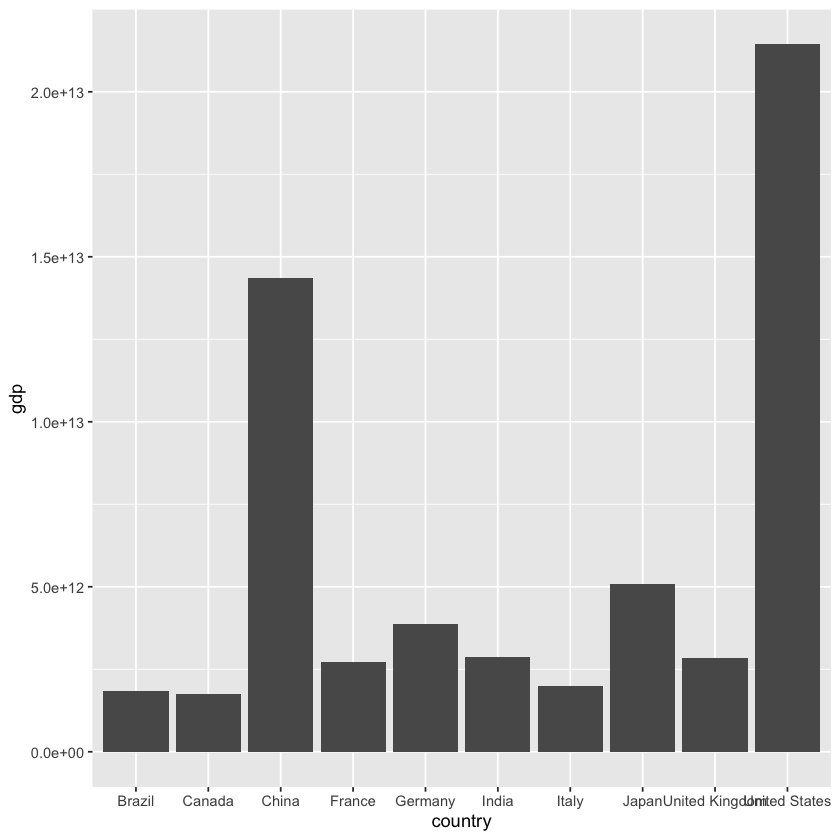

In [29]:
# Bar plot of top 10 countries by GDP
population %>% 
  arrange(desc(gdp)) %>%
  slice(1:10) %>%
  ggplot(aes(x=country, y=gdp)) +
  geom_col()

However, you can change the order of countries by GDP using the **`as_factor( )`** function. 

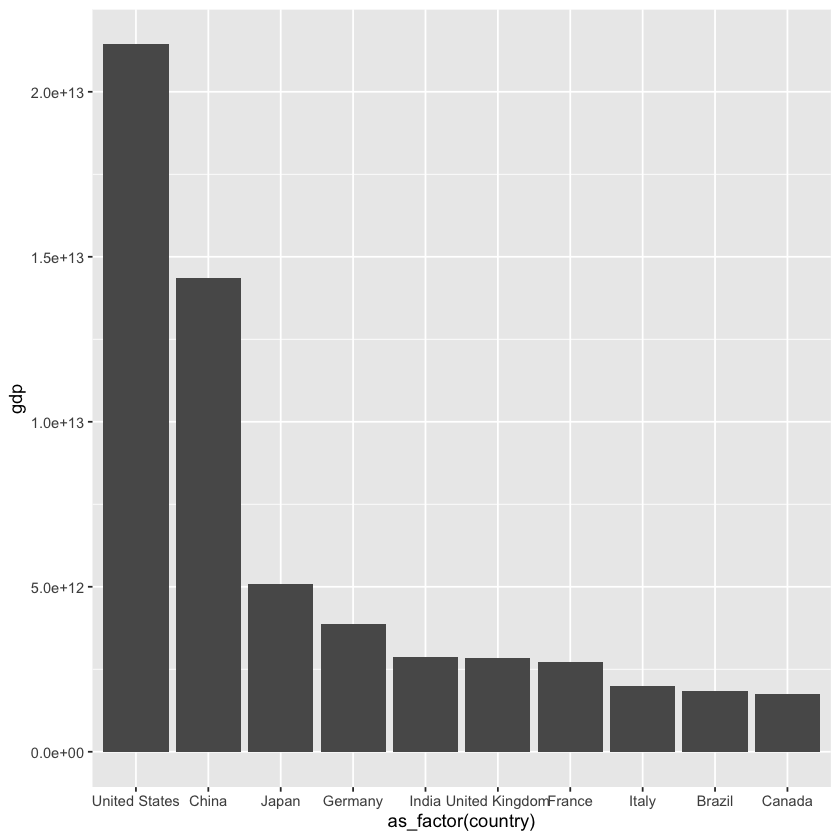

In [30]:
# Bar plot of top 10 countries sorted by GDP
population %>% 
  arrange(desc(gdp)) %>%
  slice(1:10) %>%
  ggplot(aes(x=as_factor(country), y=gdp)) +
  geom_col()

## Ordering by variable

Here, you want to ask the question, what is the distribution of values of GDP for countries that belong to low, middle, high income group.

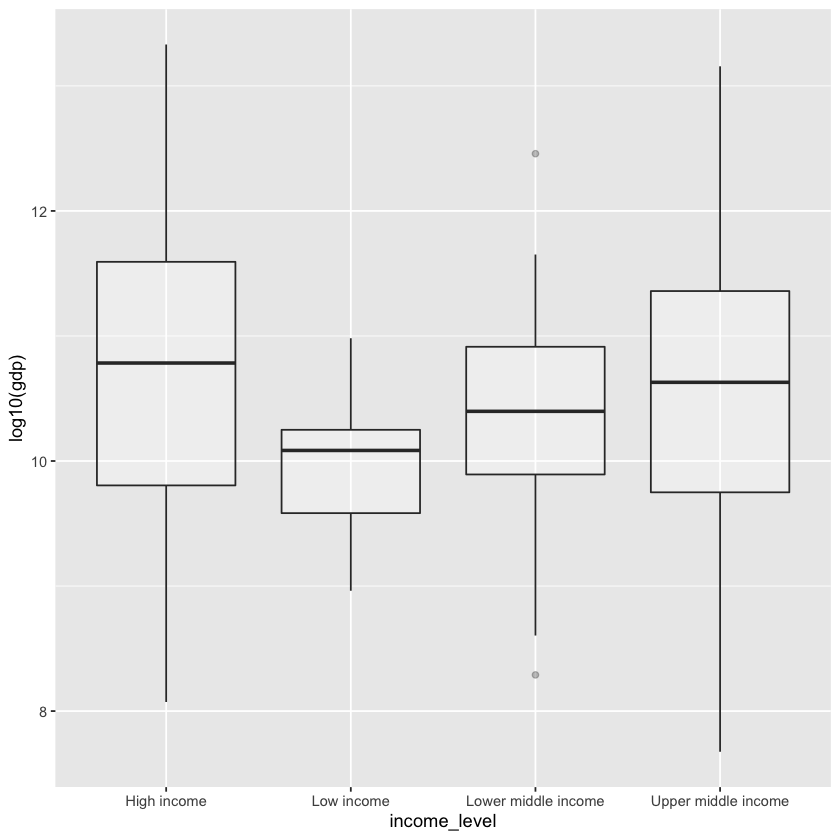

In [33]:
# Boxplot of GDP by income level
ggplot(population, aes(x=income_level, y=log10(gdp))) + 
    geom_boxplot(alpha=0.3) 

However, the income level category in the x-axis is unordered. To solve this issue, change this variable as a factor.

In [34]:
population$income_level <- factor(population$income_level,
                                 levels = c("High income", "Upper middle income", "Lower middle income", "Low income"))

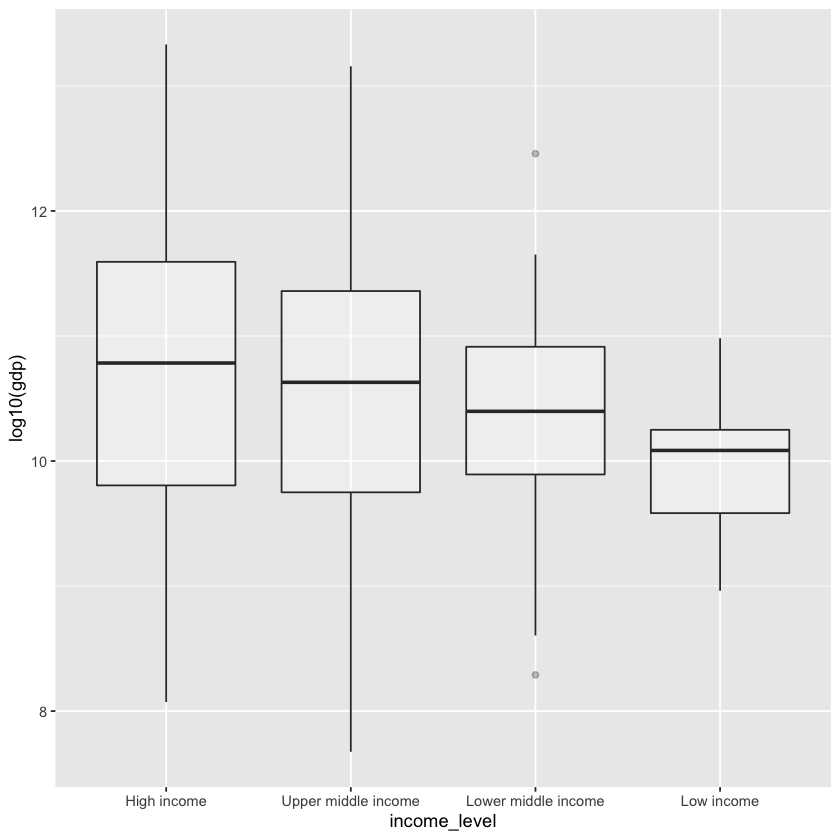

In [35]:
# Boxplot of GDP arranged by income level
ggplot(population, aes(x=income_level, y=log10(gdp))) + 
    geom_boxplot(alpha=0.3) 

## **lubridate** package

The **lubridate** package contains functions for working with dates and times. Check out the [cheatsheet for **lubridate**](https://raw.githubusercontent.com/rstudio/cheatsheets/master/lubridate.pdf) to familiarize yourself with its functions.

In [36]:
# Load the 'lubridate' package
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [37]:
# Read the documentation for 'lubridate'
help("lubridate")

lubridate-package {lubridate},R Documentation


In the remaining exercise, you will answer the question, how is the COVID-19 vaccination in your country and around the world. The COVID-19 vaccination data is available from the [Our World in Data](https://ourworldindata.org/) website, which contains a rich collection of global data and figures from the University of Oxford. Import the vaccination data from their [GitHub site](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv).

In [39]:
# Import the COVID-19 vaccination data
link <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccine  <- read_csv(link)
head(vaccine)


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,ALB,2021-01-10,0,0,NA,NA,NA,0.00,0.00,NA,NA
Albania,ALB,2021-01-11,NA,NA,NA,NA,64,NA,NA,NA,22
Albania,ALB,2021-01-12,128,128,NA,NA,64,0.00,0.00,NA,22
Albania,ALB,2021-01-13,188,188,NA,60,63,0.01,0.01,NA,22
Albania,ALB,2021-01-14,266,266,NA,78,66,0.01,0.01,NA,23
Albania,ALB,2021-01-15,308,308,NA,42,62,0.01,0.01,NA,22


Notice that the **'date'** column was automatically parsed for you using the **`col_date( )`** function during data importation.  The data dictionary describing each column is available [here](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations).

In [ ]:
# Is the vaccination data in tidy format? Yes or No. 
# Answer:

Plot the number of people vaccinated per 100 individuals since the start of the vaccination campaign. Modify the code below to add your country. Feel free to add up more countries as long as it will not clutter the graph.

Warning message:
“Removed 39 rows containing missing values (geom_point).”


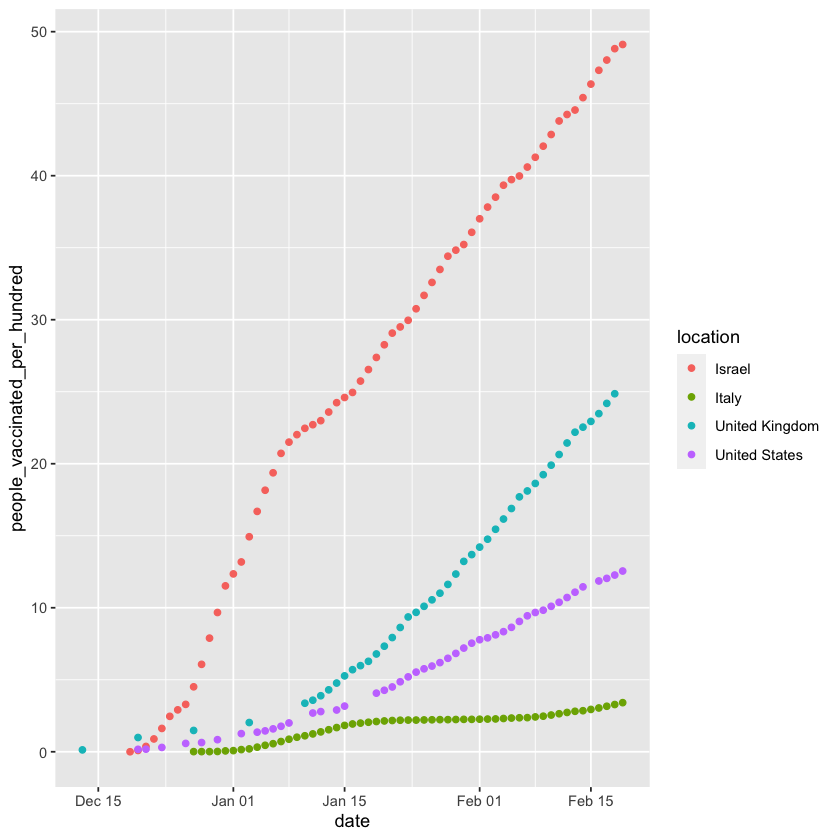

In [66]:
vaccine  %>% 
    filter(location %in% c("United Kingdom", "United States", "Israel", "Italy")) %>% 
    ggplot(aes(date, people_vaccinated_per_hundred, color = location)) +
    geom_point()

In the figure, Israel is leading in the COVID-19 vaccination campaign. 

In [ ]:
# What is the vaccination rate for COVID-19, so far in your country?
# Answer:

## Parsing dates

When parsing dates, you need to identify the order in which the year **`y`**, month **`m`**, and day **`d`** appears in your dates. Use the accessor functions **`year( )`**, **`month( )`**, **`mday( )`** (day of the month), **`yday( )`** (day of the year), **`wday( )`** (day of the week) to extract date information.

In [84]:
# UK was the first country to roll out the COVID-19 vaccine. 
# What is the date of the first row in this dataset?
start <- vaccine %>% 
    filter(location %in% "United Kingdom") %>%
    slice(1) %>%
    .$date
print(start)

[1] "2020-12-13"


In [78]:
# What day of the week was this?
wday(start, label = TRUE)

[1] Sun
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

## Time intervals

Using the **`interval( )`** function, you can save an interval of time as an interval class object. 

In [90]:
# What is the date of the last row in this dataset?
current <- vaccine %>% 
    filter(location %in% "United Kingdom") %>%
    slice(nrow(.)) %>%
    .$date
print(current)

[1] "2021-02-18"


In [91]:
# Create a time interval for COVID-19 vaccination
vaccine_interval <- interval(start, current)
print(vaccine_interval)

[1] 2020-12-13 UTC--2021-02-18 UTC


## Duration 

The duration class in lubridate represents a time span in number of seconds. Use the **`dyears( )`**, **`dmonths( )`**, **`ddays( )`** functions to evaluate the duration of an object. The duration class will always supply mathematically precise results. When you subtract two dates in lubridate, a difftime object is returned.

In [92]:
# How many days since the start of COVID-19 vaccination in the UK?
current - start

Time difference of 67 days

In [94]:
# What is duration of COVID-19 vaccination so far?
vaccine_duration <- as.duration(current - start)
print(vaccine_duration)

[1] "5788800s (~9.57 weeks)"


In [97]:
# What is the duration in terms of days?
vaccine_duration/ddays(1)

[1] 67

In [99]:
# What is the duration in terms of months?
vaccine_duration/dmonths(1)

[1] 2.201232

## Period

The period class in lubridate represents a time span that is friendly to humans since it is not based in seconds and it is usually express in days and months. Use the **`years( )`**, **`months( )`**, **`days( )`** functions to evaluate the period of an object.

In [102]:
vaccine_period <- as.period(current - start)
print(vaccine_period)

[1] "67d 0H 0M 0S"


You just scratched the surface of analyzing time-series data. To learn more about lubridate, read the [original article](https://www.jstatsoft.org/article/view/v040i03) about it.